# **Dense Net Image Classification**

## Import Libraries

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import os
import tensorflow as tf
print(os.listdir("image/"))

['animal', 'object.csv', 'person', 'vehicle']


In [9]:
df=pd.read_csv("image/object.csv")
df.head()

,filepaths,labels,category
0,image/animal/0.jpg,0,animal
1,image/animal/1.jpg,0,animal
2,image/animal/2.jpg,0,animal
3,image/animal/3.jpg,0,animal
4,image/animal/4.jpg,0,animal


In [10]:
print("Number of Samples: ",len(df))
print("Number of Labels: ",np.unique(df.labels))

Number of Samples:  2805
Number of Labels:  [0 1 2]


UnderStanding Data

D:\Program Files\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='labels', ylabel='Density'>

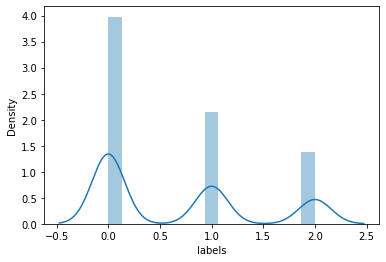

In [11]:
sns.distplot(df.labels)

In [17]:
from skimage.transform import resize
train=pd.read_csv("image/object.csv")
train_images=[]
path=""
for i in train.filepaths:
    image = plt.imread(path+i)
    train_images.append(image)
    if image.shape != (100, 100, 3):
        print(i, ":", image.shape)

In [18]:
train_images2=np.asarray(train_images)
X=train_images2
y=train.labels
print("Labels: ",y.shape)
print("Images: ",X.shape)

Labels:  (2805,)
Images:  (2805, 100, 100, 3)


image in dataset

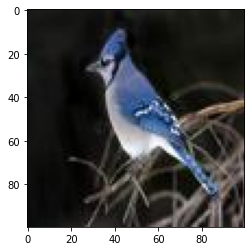

In [19]:
plt.imshow(X[200])

## Setting Data set

In [20]:
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
cat_test_y = np_utils.to_categorical(y_test)
y_train=np_utils.to_categorical(y_train)

print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (2524, 100, 100, 3)
y_train shape :  (2524, 3)
x_test shape :  (281, 100, 100, 3)
y_test shape :  (281,)


# Implementation of denseNet

In [23]:
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, BatchNormalization, concatenate, AveragePooling2D
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

base_model=DenseNet121(weights='imagenet',include_top=False, input_shape=(100, 100, 3)) 

x=base_model.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.2)(x)
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.2)(x)

preds=Dense(3,activation='softmax')(x) #FC-layer

model=Model(inputs=base_model.input,outputs=preds)
model.compile(Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 106, 106, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d_2[0][0]']       
                                                                                            

## Prediction with DenseNet

In [24]:
batch_size = 32
epochs = 10
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, cat_test_y))

Epoch 1/10
79/79 [==============================] - 367s 4s/step - loss: 0.2817 - accuracy: 0.8978 - val_loss: 0.1943 - val_accuracy: 0.9253
Epoch 2/10
79/79 [==============================] - 347s 4s/step - loss: 0.0643 - accuracy: 0.9806 - val_loss: 0.0921 - val_accuracy: 0.9751
Epoch 3/10
79/79 [==============================] - 348s 4s/step - loss: 0.0299 - accuracy: 0.9917 - val_loss: 0.0712 - val_accuracy: 0.9644
Epoch 4/10
79/79 [==============================] - 350s 4s/step - loss: 0.0277 - accuracy: 0.9921 - val_loss: 0.0753 - val_accuracy: 0.9822
Epoch 5/10
79/79 [==============================] - 350s 4s/step - loss: 0.0172 - accuracy: 0.9952 - val_loss: 0.0375 - val_accuracy: 0.9822
Epoch 6/10
79/79 [==============================] - 350s 4s/step - loss: 0.0106 - accuracy: 0.9968 - val_loss: 0.0395 - val_accuracy: 0.9893
Epoch 7/10
79/79 [==============================] - 385s 5s/step - loss: 0.0081 - accuracy: 0.9968 - val_loss: 0.0272 - val_accuracy: 0.9858
Epoch 8/10
79

## Traning and Testing Visualisation

Generating plots...


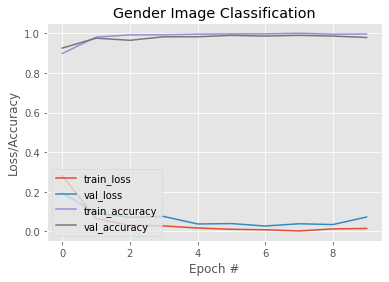

In [25]:
import sys
import matplotlib
print("Generating plots...")
sys.stdout.flush()
matplotlib.use("Agg")
matplotlib.pyplot.style.use("ggplot")
matplotlib.pyplot.figure()
N = epochs 
matplotlib.pyplot.plot(np.arange(0, N), history.history["loss"], label="train_loss")
matplotlib.pyplot.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
matplotlib.pyplot.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
matplotlib.pyplot.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
matplotlib.pyplot.title("Gender Image Classification")
matplotlib.pyplot.xlabel("Epoch #")
matplotlib.pyplot.ylabel("Loss/Accuracy")
matplotlib.pyplot.legend(loc="lower left")
matplotlib.pyplot.savefig("plot.png")

## Testing and overall accuracy Score

In [26]:
from sklearn import metrics
label_pred = model.predict(x_test)

pred = []
for i in range(len(label_pred)):
    pred.append(np.argmax(label_pred[i]))

Y_test = np.argmax(cat_test_y, axis=1)

print(metrics.classification_report(Y_test, pred))
print("---------------------------------------------------")
print(metrics.accuracy_score(Y_test, pred))
print("Accuracy: ", round(metrics.accuracy_score(Y_test, pred)*100, 3), '%')

9/9 [==============================] - 24s 2s/step
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       145
           1       1.00      1.00      1.00        79
           2       1.00      0.89      0.94        57

    accuracy                           0.98       281
   macro avg       0.99      0.96      0.97       281
weighted avg       0.98      0.98      0.98       281

---------------------------------------------------
0.9786476868327402
Accuracy:  97.865 %


In [27]:
print(len(pred))

281


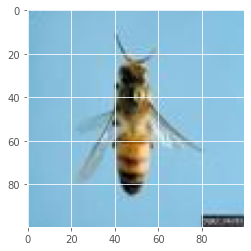

In [28]:
plt.imshow(x_test[1])

In [29]:
print(label_pred[1])

[9.8706788e-01 4.2978721e-05 1.2889191e-02]


In [30]:
print(Y_test[1])

0


C:\Users\arahm\AppData\Local\Temp/ipykernel_13276/4097496483.py:15: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


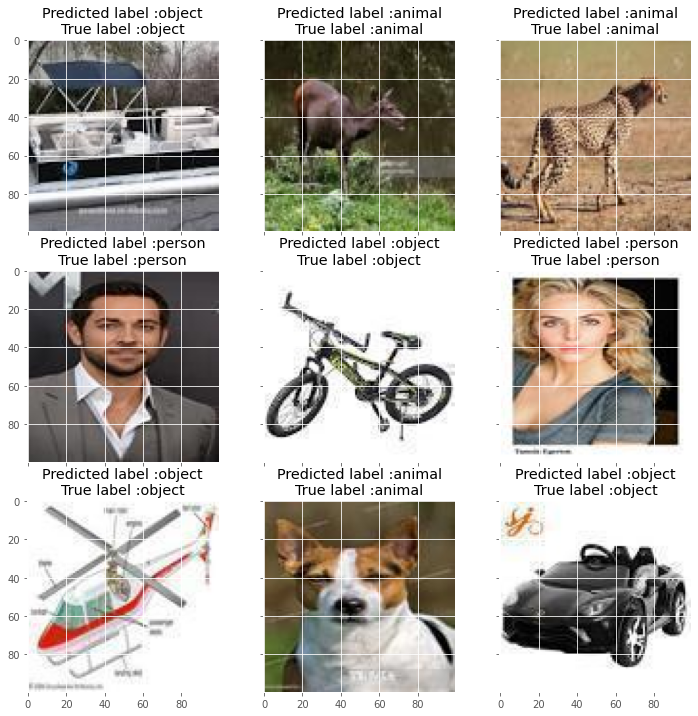

In [34]:
import random
label=['animal','person','object']

nrows = 3
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(12, 12))

r = random.randint(0, 80)
for row in range(nrows):
    for col in range(ncols):
        r = random.randint(0, 80)
        ax[row,col].imshow(x_test[r])
        ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(label[np.argmax(cat_test_y[r])], label[np.argmax(cat_test_y[r])]))

plt.show()
#matplotlib.pyplot.savefig("plot.png")

In [35]:
model.save("model_97.h5")

# Test

In [94]:
print(os.listdir("test/data_indo/resize/botak"))
addr = os.listdir("test/data_indo/resize/botak")

['001.jpg', '002.jpg', '003.jpg', '004.jpg', '005.jpeg', '006.jpg']


In [95]:
print(len(addr))
addrs=len(addr)

6


In [96]:
test_images=[]
pp="test/data_indo/resize/botak/"
for i in addr:
    indd = plt.imread(pp+i)
    test_images.append(indd)

(90, 70, 3)


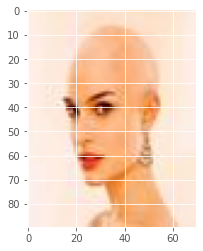

In [97]:
plt.imshow(test_images[0])
print(test_images[0].shape)

In [98]:
# Making a Single Prediction
import numpy as np
from keras.preprocessing import image

hasilx = []

for i in addr:
  imge = 'test/data_indo/resize/botak/'+i
  # load
  test_image = keras.utils.load_img('test/data_indo/resize/botak/'+i)

  # convert image to numpy array
  images = keras.utils.img_to_array(test_image)
  
  # expand dimension of image
  images = np.expand_dims(images, axis=0)

  # making prediction with model
  prediction = model.predict(images)
  reslt = np.argmax(prediction)
  hasilx.append(reslt)
  print(imge)

  if reslt == 0:
    print('female')
  else:
    print('male')
print(hasilx)

1/1 [==============================] - 0s 43ms/step
test/data_indo/resize/botak/001.jpg
female
1/1 [==============================] - 0s 49ms/step
test/data_indo/resize/botak/002.jpg
female
1/1 [==============================] - 0s 47ms/step
test/data_indo/resize/botak/003.jpg
male
1/1 [==============================] - 0s 51ms/step
test/data_indo/resize/botak/004.jpg
male
1/1 [==============================] - 0s 54ms/step
test/data_indo/resize/botak/005.jpeg
female
1/1 [==============================] - 0s 58ms/step
test/data_indo/resize/botak/006.jpg
female
[0, 0, 1, 1, 0, 0]


C:\Users\arahm\AppData\Local\Temp/ipykernel_11840/1061057941.py:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


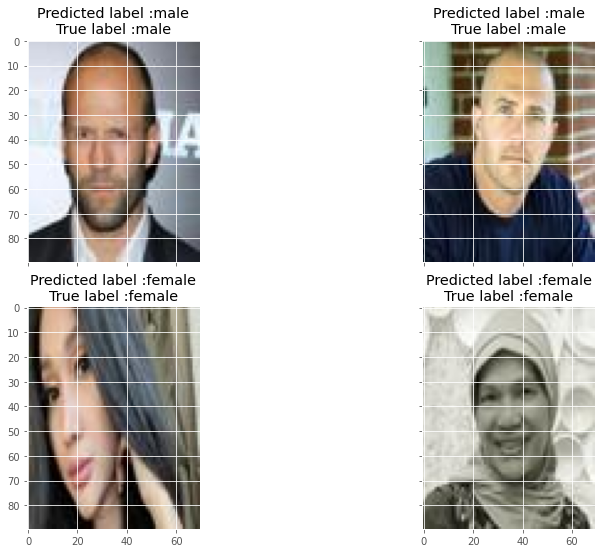

In [99]:
label=['female','male']

nrows = 2
ncols = 2
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(13, 9))

n = 2
for row in range(nrows):
    for col in range(ncols):
        ax[row,col].imshow(test_images[n])
        ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(label[hasilx[n]], label[hasilx[n]]))
        n+=1

plt.show()